<a href="https://colab.research.google.com/github/evpozdniakov/ds_projects/blob/master/project1/DataSciencePython13Module9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

In [88]:
churn_orig = pd.read_csv('churn.csv')
churn_orig.drop(columns='RowNumber', inplace=True)

def churncp():
  return churn_orig.copy()


In [89]:
ch = churncp()

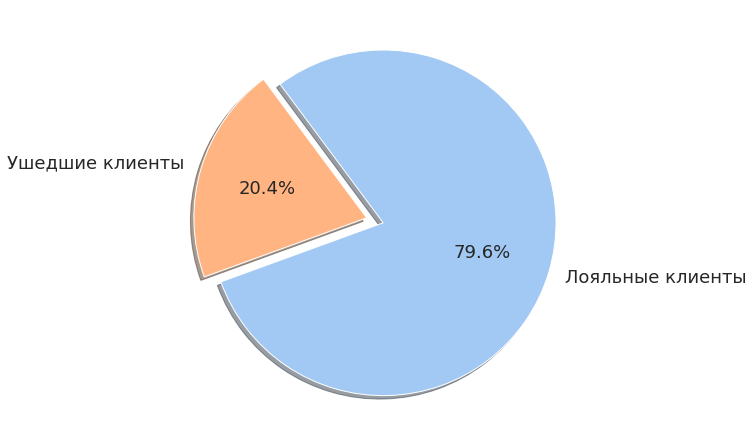

In [90]:
# 9.1. Каково соотношение ушедших и лояльных клиентов?
# Покажите это на графике и дайте комментарий по соотношению.

loyal_vs_ex = ch.groupby('Exited')['Exited'].count().transform(lambda x: x / ch.shape[0] * 100)

figure = plt.figure(figsize=(10, 6))
ax = figure.add_axes([0,0,1,1])
ax.pie(
    loyal_vs_ex, 
    explode=[0, 0.1], 
    labels=['Лояльные клиенты', 'Ушедшие клиенты'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 18},
    shadow=True,
    startangle=200,
    colors=colors
);

# Комментарий
# -----------
# Из графика мы видим что соотношение ушедших клиентов к лояльным составляет пропорцию 1:4.
# Иначе говоря, из каждых пяти пришедших клиентов остаются лишь четыре, а один уходит.

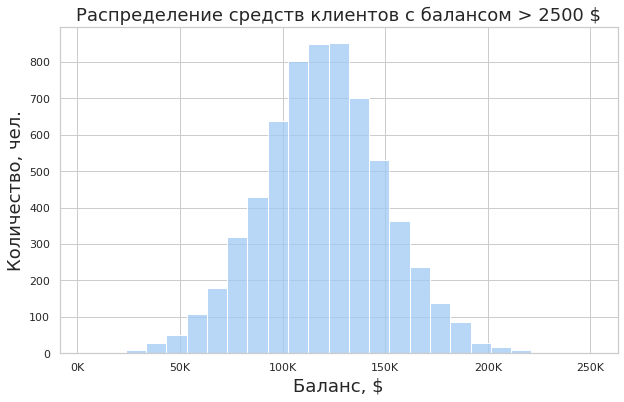

In [284]:
# 9.2. Постройте график, показывающий распределение баланса пользователей,
# у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

ch = churncp()

mask = ch['Balance'] > 2500

balance_data = ch[mask]

plt.figure(figsize=(10, 6))
g = sns.histplot(balance_data, x='Balance', bins=25, color=colors[0])
g.set_xticklabels([f"{round(x)}K" for x in g.get_xticks()/1000]);

g.set_title('Распределение средств клиентов с балансом > 2500 $', fontsize=18)
g.set_xlabel('Баланс, $', fontsize=18);
g.set_ylabel('Количество, чел.', fontsize=18);

# Комментарий
# -----------
# Из графика мы видим, что распределение денежных средств на счетах клиентов
# с балансом более 2500$ соответствует нормальному распределению:
# - небольшое кол-во клиентов с балансом 50K $ и менее
# - небольшое кол-во клиентво с балансом 190K $ и более
# - больше всего клиентов (~3500 человек) с балансом от 90K до 150K $
# 
# Вывод
# -----
# Если предположить, что уходящие клиенты являются среднестатистическими
# (то есть имеют такой же баланс, как и лояльные), то сохранение хотя бы половины из ушедших
# позволило бы банку получить дополнительных активов на сумму не менее 42 млн. долларов
# 
# 120K * 3500 * 0.2 / 2 ≈ 42M
# 
# здесь 
#   120K - баланс среднестатистического клиента
#   3500 - приблизительное кол-во клиентов с таким балансом
#   0.2 - это 20% ушедших клиентов
#   1/2 - это половина из ушедших клиентов

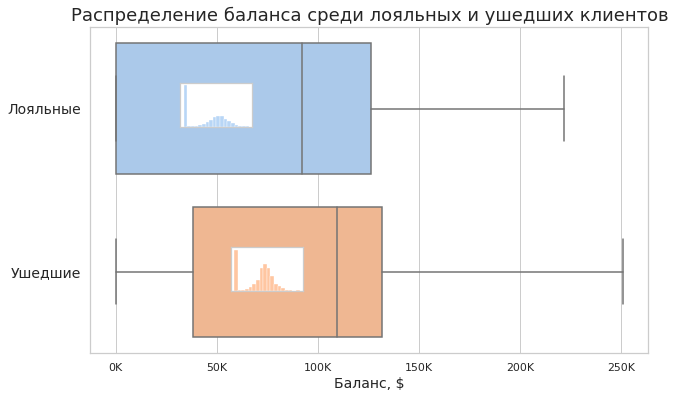

In [92]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig = plt.figure(figsize=(10, 6))

g = sns.boxplot(data=ch, y='Exited', x='Balance', orient='h', palette="pastel")

g.set_xticklabels([f"{round(x)}K" for x in g.get_xticks()/1000]);
g.set_yticklabels(['Лояльные', 'Ушедшие'], fontsize=14);

g.set_title('Распределение баланса среди лояльных и ушедших клиентов', fontsize=18)
g.set_xlabel('Баланс, $', fontsize=14);
g.set_ylabel('');

def hist(ax, data, color):
  g = sns.histplot(ax=ax, data=data, x='Balance', color=color)
  g.tick_params(left=False, bottom=False)
  g.set_xticks([])
  g.set_yticks([])
  g.set_xlabel('')
  g.set_ylabel('')
  ax2.grid(False)


ax2 = plt.axes([0.25, 0.65, 0.1, 0.1])
hist(ax2, ch[ch['Exited'] == 0], colors[0])

ax3 = plt.axes([0.32, 0.27, 0.1, 0.1])
hist(ax3, ch[ch['Exited'] == 1], colors[1])


# Комментарий
# -----------
# Количество клиентов с нулевым балансом намного больше среди лояльных клиентов.
# Возможно они пользуются банком не для того, чтобы хранить там свои деньги и получать проценты,
# а ради каких-то иных услуг. Среди ушедших клиентов подавляющее большинство это люди
# со значительными средствами на счету. Возможно у банка нет инструмента, позволяющего клиентам
# получать годовые проценты за хранение своих сбережений, или данную услугу лучше предоставляют конкуренты.

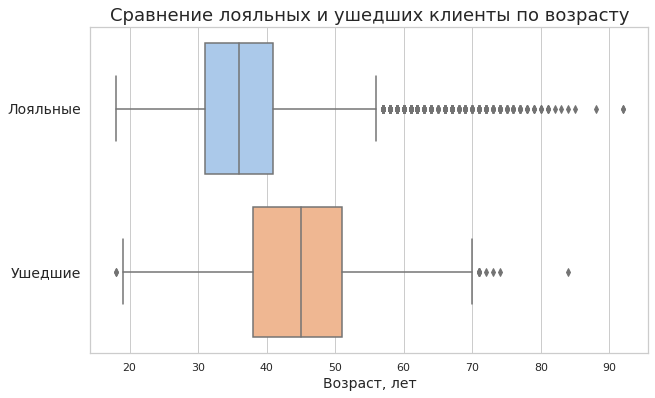

In [96]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

plt.figure(figsize=(10, 6))
g = sns.boxplot(data=ch, y='Exited', x='Age', orient='h', palette="pastel")

g.set_title('Сравнение лояльных и ушедших клиенты по возрасту', fontsize=18)
g.set_xlabel('Возраст, лет', fontsize=14);
g.set_ylabel('');
g.set_yticklabels(['Лояльные', 'Ушедшие'], fontsize=14);

# Комментарий
# -----------
# Лояльные клиенты это люди в возрасте от 30 до 40.
# (Хотя в этой группе больше потенциальных выбросов, людей 55+.)
# Ушедшие клиенты в основном на 10 лет старше.
# Банку следует обратить внимание прежде всего на возрастную категорию от 40 до 50.
# Но также иметь в виду и клиентов 50+.


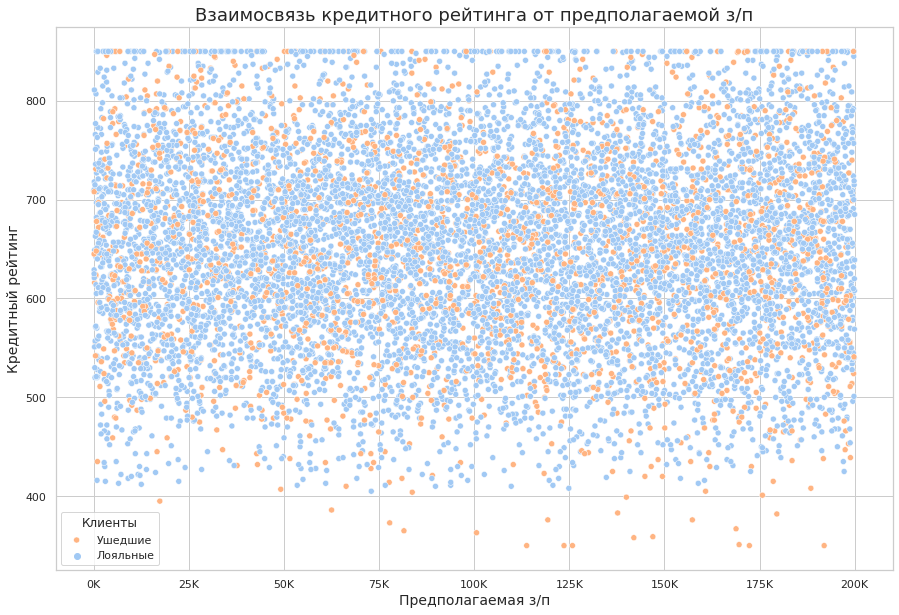

In [102]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента
# и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

plt.figure(figsize=(15, 10))
g = sns.scatterplot(data=ch, x='EstimatedSalary', y='CreditScore', hue='Exited', palette='pastel');

g.set_xticklabels([f"{round(x)}K" for x in g.get_xticks()/1000]);

g.set_title('Взаимосвязь кредитного рейтинга от предполагаемой з/п', fontsize=18)
g.set_xlabel('Предполагаемая з/п', fontsize=14);
g.set_ylabel('Кредитный рейтинг', fontsize=14);

g.legend(title='Клиенты', labels=['Ушедшие', 'Лояльные']);
g.grid(True)

# Комментарий
# -----------
# Из графика мы видим что не существует четкой взаимосвязи между 
# предполагаемой заработной платой и кредтиным рейтингом в обеих группах.


In [313]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

data = ch[['Gender', 'Exited', 'CustomerId']]
data = data.groupby(['Gender', 'Exited']).count().reset_index()
data.rename(columns={'CustomerId': 'Count'}, inplace=True)

men=ch['Gender'] == 'Male'
wmn=ch['Gender'] == 'Female'

men_wmn = pd.DataFrame([
    ['Male', ch[men].shape[0]],
    ['Female', ch[wmn].shape[0]],
    ], columns=['Gender', 'All']
)

data = data.merge(men_wmn, on='Gender')

data['Percent'] = round(data['Count'] / data['All'] * 100, 1)
data['Клиенты'] = data['Exited'].apply(lambda x: 'Ушедшие' if x == 1 else 'Лояльные')

data

# plt.figure(figsize=(10, 6));

# g = sns.barplot(
#     data=data,
#     x="Percent", y="Gender", hue="Клиенты",
#     palette='pastel',
#     # legend=False,
#     orient='h',
# );

# g.set_title('Сравнение лояльных и ушедших клиентов по полу', fontsize=18)
# g.set_yticklabels(['Женщины', 'Мужчины'], fontsize=14);
# g.set_ylabel('');
# g.set_xlabel('');

# def show_values(axs):
#     def _single(ax):
#         for p in ax.patches:
#             _x = p.get_x() + p.get_width() - 10
#             _y = p.get_y() + p.get_height() - (p.get_height()*0.4)
#             value = '{:.1f}%'.format(p.get_width())
#             ax.text(_x, _y, value, fontsize=18)

#     if isinstance(axs, np.ndarray):
#         for idx, ax in np.ndenumerate(axs):
#             _single(ax)
#     else:
#         _single(axs)

# show_values(g);

# Комментарий
# -----------
# Из графика мы видим, что женщины разрывают контракт с банком в полтора раза чаще, чем мужчины.

,Gender,Exited,Count,All,Percent,Клиенты
0,Female,0,3404,4543,74.9,Лояльные
1,Female,1,1139,4543,25.1,Ушедшие
2,Male,0,4559,5457,83.5,Лояльные
3,Male,1,898,5457,16.5,Ушедшие


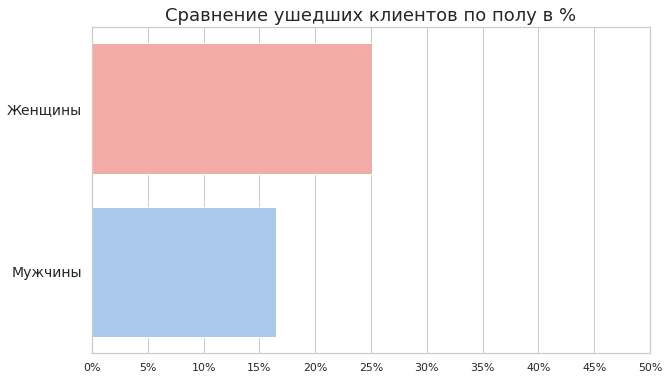

In [350]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

data = ch[['Gender', 'Exited']]
data = data.groupby(['Gender'])['Exited'].mean().reset_index()
data['Exited_percent'] = data['Exited'] * 100
data.drop(columns='Exited', inplace=True)

plt.figure(figsize=(10, 6));

g = sns.barplot(
    data=ch,
    x='Exited',
    y='Gender',
    estimator=lambda x: round(x.mean() * 100, 1),
    ci=None,
    orient='h',
    palette=[colors[3], colors[0]],
);

g.set_title('Сравнение ушедших клиентов по полу в %', fontsize=18)
g.set_yticklabels(['Женщины', 'Мужчины'], fontsize=14);
g.set_ylabel('');
g.set_xlabel('');

xticks_range = range(0, 51, 5)
g.set_xticks(xticks_range);
g.set_xticklabels([f'{x}%' for x in xticks_range]);


In [262]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

data = ch[['NumOfProducts', 'Exited']]
mask = data['Exited'] == 1

data[mask].groupby('NumOfProducts').count().reset_index




,NumOfProducts,Exited
0,1,1409
1,2,348
2,3,220
3,4,60


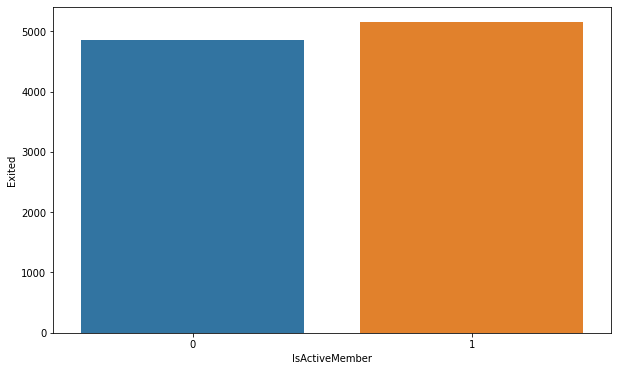

In [15]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?

plt.figure(figsize=(10, 6))

# g = sns.barplot(y='Exited', data=ch, x='IsActiveMember')

data = ch.groupby('IsActiveMember').count()['Exited'].reset_index()

g = sns.barplot(y='Exited', data=data, x='IsActiveMember')


In [57]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

import plotly
import plotly.express as px

plt.figure(figsize=(10, 6))

data = ch[['Geography', 'Exited']].groupby('Geography').agg(['count', 'sum']).reset_index()

data['ExitedPercent'] = round(data['Exited']['sum'] / data['Exited']['count'] * 100, 1)

fig = px.choropleth(
    data_frame=data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="ExitedPercent", #от чего зависит цвет
    range_color=[0, 100], #диапазон цвета
    # title='Global Spread of COVID-19', #заголовок
    # width=800, #ширина
    # height=500, #высота
    color_continuous_scale='Reds', #палитра цветов
    scope='europe',
);

fig.show();

<Figure size 720x432 with 0 Axes>

In [85]:
# 9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

ch['CreditScoreCat'] = ch['CreditScore'].apply(get_credit_score_cat)

data = ch.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', 
                      aggfunc=[lambda x: x.sum() / x.count()])

data

<lambda>                      ...                              
Tenure                0         1         2   ...        8         9         10
CreditScoreCat                                ...                              
Excellent       0.275000  0.208333  0.137255  ...  0.196078  0.270833  0.254902
Fair            0.217391  0.215596  0.213043  ...  0.209016  0.190045  0.205357
Good            0.203822  0.203608  0.187342  ...  0.152355  0.194667  0.197802
Poor            0.226415  0.259398  0.211765  ...  0.214575  0.251082  0.169492
Very_Poor       0.444444  0.253731  0.151515  ...  0.253521  0.229508  0.333333

[5 rows x 11 columns]

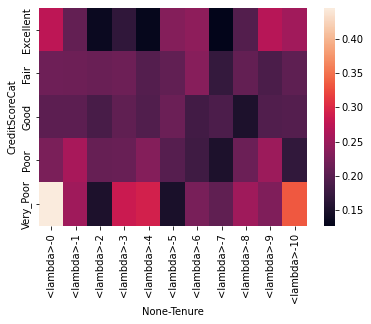

In [75]:
sns.heatmap(data=data)

In [86]:
data = ch.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', 
                      aggfunc=[lambda x: f'{x.sum()}/{x.count()}'])

In [87]:
data

<lambda>                          ...                                
Tenure               0       1       2       3   ...      7       8       9       10
CreditScoreCat                                   ...                                
Excellent         11/40   20/96  14/102  17/101  ...   12/94  20/102   26/96   13/51
Fair              20/92  47/218  49/230  50/231  ...  45/263  51/244  42/221  23/112
Good             32/157  79/388  74/395  76/369  ...  71/370  55/361  73/375  36/182
Poor             24/106  69/266  54/255  52/245  ...  36/238  53/247  58/231  20/118
Very_Poor          8/18   17/67   10/66   18/63  ...   13/63   18/71   14/61    9/27

[5 rows x 11 columns]

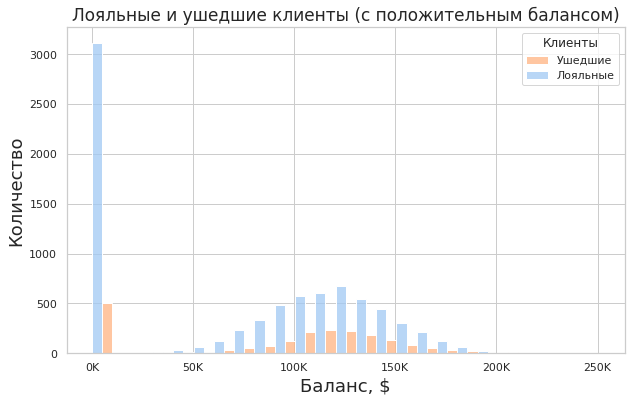

In [93]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

mask = ch['Balance'] > 0

plt.figure(figsize=(10, 6))
g = sns.histplot(ch, x='Balance', hue='Exited', bins=25, palette='pastel', multiple="dodge")
g.set_xticklabels([f"{round(x)}K" for x in g.get_xticks()/1000]);

g.set_title('Лояльные и ушедшие клиенты (с положительным балансом)', fontsize=17)
g.set_xlabel('Баланс, $', fontsize=18);
g.set_ylabel('Количество', fontsize=18);

g.legend(title='Клиенты', loc='upper right', labels=['Ушедшие', 'Лояльные']);

# Комментарий
# -----------
# Распределение баланса ушедших и лояльных клиентов не имеет явных отличий.
# Видимо причина ухода не связана с этим признаком.
